# Exercise P2 - TDT 4265 Computer Vision and Deep Learning

Run the cell below to load the [**MNIST**](http://yann.lecun.com/exdb/mnist/) data set, which you will use in **Task 1 and Task 2**. 

As you recall from the class, we generally split the training set into train + vaildation as shows in the following image (This will be done at the end of this section).

![alt text](https://i.imgur.com/X6DMWIf.png)


In [35]:
  #@title Default title text
  print('Ensure that we have Keras installed')
  !pip install -q keras
  from keras.datasets import mnist

  # The data, split between train and test sets
  # x_train is a list of training images, y_train is a list og training lables
  # x_test is a list of test images, y_test is a list of test lables
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  print('x_train size: {}, y_train size: {}\n'.format(len(x_train), len(y_train)))

  # Show the format of one randomly chosen image and label (123)
  image = x_train[123]
  label = y_train[123]

  print('Image shape: {}'.format(image.shape))
  print('Label: {}'.format(label))

  print('x_train size: {}, y_train size: {}\n'.format(len(x_train), len(y_train)))



Ensure that we have Keras installed
x_train size: 60000, y_train size: 60000

Image shape: (28, 28)
Label: 7
x_train size: 60000, y_train size: 60000



## Task 0: Create a helper function to plot and visulize the training
> **(might be smart to solve after Task 1)**

**Input:** history (keras history from the training)

### GOAL: 
1. Create a graph that plots **Loss vs epochs** and one that plots **Accuracy vs epochs** of the **training and validation set**

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

def plot_training_score(history):
  print('Availible variables to plot: {}'.format(history.history.keys()))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'validate'], loc = 'upper left')
  plt.show()
  
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'validate'], loc = 'upper left')
  plt.show()
  
  # TODO: Visulize the plot, to be applied after traing is complete

## Task 1 (20%): Classification using fully-connected neural networks 
#### Dataset:  [MNIST](http://yann.lecun.com/exdb/mnist/)
### Subtask 1.1
1. Print the model structure 
2. Visualize the training as it progresses (Task 0) - static plot when training is complete is OK
3. Output the final score of the test set, **should be above 90%**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_81 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 115us/step - loss: 0.2314 - acc: 0.9310 - val_loss: 0.1404 - val_acc: 0.9559
Epoch 2/10
20864/48000 [============>.................] - ETA: 2s - loss: 0.1001 - acc: 0.9690

48000/48000 [==============================] - 5s 102us/step - loss: 0.0930 - acc: 0.9716 - val_loss: 0.1000 - val_acc: 0.9702
Epoch 3/10
48000/48000 [==============================] - 5s 102us/step - loss: 0.0620 - acc: 0.9817 - val_loss: 0.0910 - val_acc: 0.9732
Epoch 4/10
48000/48000 [==============================] - 5s 102us/step - loss: 0.0451 - acc: 0.9863 - val_loss: 0.0847 - val_acc: 0.9768
Epoch 5/10
48000/48000 [==============================] - 5s 102us/step - loss: 0.0329 - acc: 0.9899 - val_loss: 0.0883 - val_acc: 0.9773
Epoch 6/10
 1216/48000 [..............................] - ETA: 4s - loss: 0.0206 - acc: 0.9934

48000/48000 [==============================] - 5s 102us/step - loss: 0.0244 - acc: 0.9925 - val_loss: 0.0889 - val_acc: 0.9775
Epoch 7/10
48000/48000 [==============================] - 5s 103us/step - loss: 0.0194 - acc: 0.9940 - val_loss: 0.0910 - val_acc: 0.9799
Epoch 8/10
48000/48000 [==============================] - 5s 103us/step - loss: 0.0151 - acc: 0.9953 - val_loss: 0.0938 - val_acc: 0.9784
Epoch 9/10
47424/48000 [============================>.] - ETA: 0s - loss: 0.0117 - acc: 0.9965

48000/48000 [==============================] - 5s 103us/step - loss: 0.0117 - acc: 0.9965 - val_loss: 0.1044 - val_acc: 0.9773
Epoch 10/10
48000/48000 [==============================] - 5s 103us/step - loss: 0.0091 - acc: 0.9973 - val_loss: 0.1167 - val_acc: 0.9767
Availible variables to plot: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


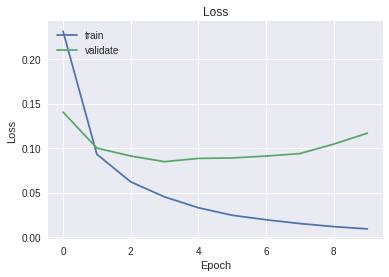

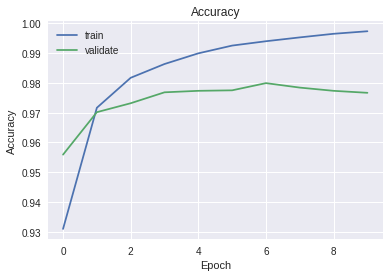

10000/10000 [==============================] - 1s 77us/step
Accuracy: 0.9803


In [36]:
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense  # Import the nessesarly layers
# Remember, you can normalize the data

NTRAIN = 60000
NTEST = 10000

input_train = x_train.astype('float32')/255
input_test = x_test.astype('float32')/255
labels_train = y_train
labels_test = y_test


# TODO: Flatten all images (Both training and testing images)
input_train_flat = input_train.reshape((NTRAIN, image.shape[0] * image.shape[1]))
input_test_flat = input_test.reshape((NTEST, image.shape[0] * image.shape[1]))

# TODO: Convert class vectors to binary class matrices (one-hot encoding)
labels_train_one_hot = to_categorical(labels_train)
labels_test_one_hot = to_categorical(labels_test)


# Returns a compiled model
def fully_connected_model(img_width, img_height):
  model = Sequential()  # Initalize a new model
  model.add(Dense(img_width*img_height, activation = 'relu', input_shape = (image.shape[0] * image.shape[1], )))
  #model.add(Dense(img_width*img_height, activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))
  
  
  model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

model = fully_connected_model(len(input_train[0]),len(input_train[0])) 
model.summary()


# TODO: Train your model (training returns history)
history = model.fit(input_train_flat, labels_train_one_hot, validation_split = 0.2, epochs = 10, batch_size = 64)


# Plot the training using helper function created in task 0
plot_training_score(history)

# TODO: Evaluate your model and print the score of the test set
score = model.evaluate(input_test_flat, labels_test_one_hot)
print("Accuracy:", score[1])

### Subtask 1.2
1. **Briefly** explain the plot from subtask 1.1
2. **Briefly** justify your model structure from subtask 1.1

**1** As the number of epoches increases the accuracy of the model on the validation set increases, while the loss stays fairly stable. After epoch 2 you can see the accuracy of the training set surpass the accuracy of the validation set, which might indicate overfitting. Still, it is not a big problem, and the accuracy of the of the validation set increases through almost all the epochs which indicates a good model as the end result. 

**2** The structure was simple enough to get a good accuracy with a short training time. It was thought that a larger model, while not providing better performance, would give rise to a possibility of overfitting.

The output layer has 10 neurons, with a softmax as this is a classifier, corresponding to the ten different symbols in the set.




## Task 2 (20%): Classification using convolutional layers + fully connected layers (i.e. CNN)
#### Dataset:  [MNIST](http://yann.lecun.com/exdb/mnist/)
### Subtask 2.1
1. Create a model using convolutional layers
2. Print the model structure
3. Visualize the training as it progresses (Task 0) - static plot when training is complete is OK
4. Output the final score of the test set, **should be above 98%**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_126 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_14 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                36928     
__________

48000/48000 [==============================] - 11s 239us/step - loss: 0.2188 - acc: 0.9304 - val_loss: 0.0550 - val_acc: 0.9826
Epoch 2/10
48000/48000 [==============================] - 11s 225us/step - loss: 0.0580 - acc: 0.9822 - val_loss: 0.0479 - val_acc: 0.9848
Epoch 3/10
34368/48000 [====================>.........] - ETA: 2s - loss: 0.0405 - acc: 0.9874

48000/48000 [==============================] - 11s 226us/step - loss: 0.0414 - acc: 0.9870 - val_loss: 0.0532 - val_acc: 0.9836
Epoch 4/10
48000/48000 [==============================] - 11s 225us/step - loss: 0.0336 - acc: 0.9896 - val_loss: 0.0456 - val_acc: 0.9874
Epoch 5/10
38080/48000 [======================>.......] - ETA: 2s - loss: 0.0282 - acc: 0.9917

48000/48000 [==============================] - 11s 228us/step - loss: 0.0282 - acc: 0.9917 - val_loss: 0.0451 - val_acc: 0.9883
Epoch 6/10
48000/48000 [==============================] - 11s 225us/step - loss: 0.0234 - acc: 0.9928 - val_loss: 0.0434 - val_acc: 0.9892
Epoch 7/10
38976/48000 [=======================>......] - ETA: 1s - loss: 0.0214 - acc: 0.9929

48000/48000 [==============================] - 11s 227us/step - loss: 0.0216 - acc: 0.9931 - val_loss: 0.0485 - val_acc: 0.9892
Epoch 8/10
48000/48000 [==============================] - 11s 225us/step - loss: 0.0192 - acc: 0.9945 - val_loss: 0.0476 - val_acc: 0.9882
Epoch 9/10
39552/48000 [=======================>......] - ETA: 1s - loss: 0.0200 - acc: 0.9943

48000/48000 [==============================] - 11s 227us/step - loss: 0.0203 - acc: 0.9942 - val_loss: 0.0531 - val_acc: 0.9878
Epoch 10/10
48000/48000 [==============================] - 11s 226us/step - loss: 0.0159 - acc: 0.9953 - val_loss: 0.0676 - val_acc: 0.9875
Availible variables to plot: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


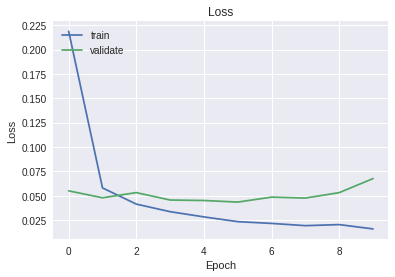

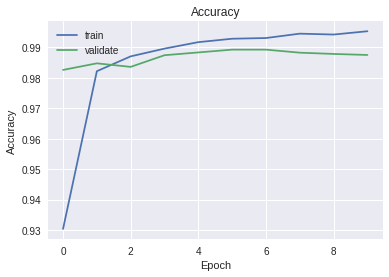

10000/10000 [==============================] - 1s 119us/step
Accuracy: 0.9889


In [37]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

labels_train = y_train
labels_test = y_test
labels_train_one_hot = to_categorical(labels_train)
labels_test_one_hot = to_categorical(labels_test)

# TODO: Reshape all images (Both training and testing images) to the following
# format: (total_images, height, width, channel), eg. (4000, 28, 28, 1)
input_train_conv = x_train.reshape((60000, 28, 28, 1))
input_test_conv = x_test.reshape((10000, 28, 28, 1))

# Returns a compiled model
def conv_model(img_width, img_height):
  model = Sequential()  # Initalize a new model
  model.add(Conv2D(32,(3,3) , activation = 'sigmoid', input_shape=(img_width,img_height,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3), activation = 'relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3), activation = 'relu'))
  model.add(Flatten())
  model.add(Dense(64,activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))
  
  model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model
  
model = conv_model(28,28)
model.summary()

# TODO: Train your model
history = model.fit(input_train_conv, labels_train_one_hot, validation_split = 0.2, epochs = 10, batch_size = 64)



# TODO: Plot the training using the helper function created in task 0
plot_training_score(history)

# TODO: Evaluate your model and print the score of the test set
score = model.evaluate(input_test_conv, labels_test_one_hot)
print("Accuracy:", score[1])

### Subtask 2.2
1. **Briefly** discuss the following concepts of your network: 
  * Filter size
  * Number of filters of each layer
  * Dropout layer (if applicable)
  * Max pooling (if applicable)
  * Regularization (if applicable)
2. **Briefly** justify your model structure from subtask 2.1


**1** 

*   **Filter Size:** Our convolutional layers have a 3x3 size filter. This means that there is a filter of size 3x3 which is convolved over each location and gives a feature map as output. The max-pooling layers has a 2x2 filter, which means that for each 2x2 of the feature maps the biggest value is chosen. This reduces the spatial size which aids in faster computation.
*   **Number of filters:** Our first convolutional layer has 32 filter, while the second has 64, which is typical for a CNN to be able to extract more specific features. Choosing the amount of filters is a balancing act between accuracy and overfitting.
*   **Max Pooling**: As already said we are using two 2x2 max-pooling layers to bring down the spatial complexity and the computational expense. 

**2**

We are using two convolutional layers to extract features from the images and two max pooling layers to reduce the compexity of the feature maps. The input images are small, so that should be sufficient. This is shown in the accuracy in the end test. To be able to classify the images into one of the ten categories the feature maps need to be flattened and passed trought a couple of dense layers, where the last layer has a softmax activation function.  




## Task 3 (20%): Cfar10 image contest

#### Dataset:  [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

Get as high accuracy as you can on the CIFAR-10 image dataset. 

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 
Your task is to do this classification using CNN with as high accuracy as you can without using transfer learning / pretrained networks.

More information on this dataset: https://www.cs.toronto.edu/~kriz/cifar.html

**Suggested alterations:** 
  * Number of hidden layers/nodes
  * Number of kernels
  * Number of layers/nodes in the fully connected head 

**NB:** Transfer learning is not allowed in this task




170500096/170498071 [==============================] - 26s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
dropout_

40000/40000 [==============================] - 18s 460us/step - loss: 1.6608 - acc: 0.4040 - val_loss: 1.4980 - val_acc: 0.4811
Epoch 2/10
40000/40000 [==============================] - 18s 451us/step - loss: 1.1771 - acc: 0.5831 - val_loss: 1.0923 - val_acc: 0.6380
Epoch 3/10
 1728/40000 [>.............................] - ETA: 16s - loss: 0.9725 - acc: 0.6372

40000/40000 [==============================] - 18s 449us/step - loss: 0.9472 - acc: 0.6679 - val_loss: 1.1063 - val_acc: 0.6127
Epoch 4/10
40000/40000 [==============================] - 18s 450us/step - loss: 0.7922 - acc: 0.7250 - val_loss: 0.8833 - val_acc: 0.6972
Epoch 5/10
 1728/40000 [>.............................] - ETA: 16s - loss: 0.6565 - acc: 0.7708

40000/40000 [==============================] - 18s 450us/step - loss: 0.6801 - acc: 0.7652 - val_loss: 0.8394 - val_acc: 0.7098
Epoch 6/10
40000/40000 [==============================] - 18s 449us/step - loss: 0.5855 - acc: 0.7975 - val_loss: 0.7873 - val_acc: 0.7334
Epoch 7/10
 1728/40000 [>.............................] - ETA: 16s - loss: 0.4887 - acc: 0.8345

40000/40000 [==============================] - 18s 447us/step - loss: 0.5031 - acc: 0.8261 - val_loss: 0.7488 - val_acc: 0.7430
Epoch 8/10
40000/40000 [==============================] - 18s 447us/step - loss: 0.4346 - acc: 0.8504 - val_loss: 0.7477 - val_acc: 0.7512
Epoch 9/10
 1728/40000 [>.............................] - ETA: 16s - loss: 0.3347 - acc: 0.8883

40000/40000 [==============================] - 18s 448us/step - loss: 0.3800 - acc: 0.8682 - val_loss: 0.7715 - val_acc: 0.7421
Epoch 10/10
40000/40000 [==============================] - 18s 448us/step - loss: 0.3385 - acc: 0.8851 - val_loss: 0.7909 - val_acc: 0.7388
Availible variables to plot: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


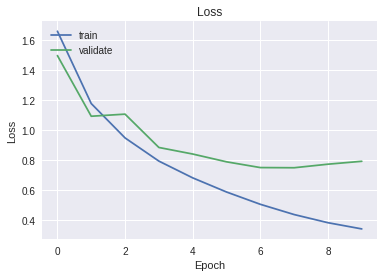

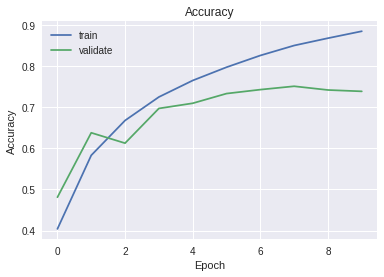

10000/10000 [==============================] - 2s 163us/step
Accuracy: 0.7359


In [7]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout


%matplotlib inline
from matplotlib import pyplot as plt

def plot_training_score(history):
  print('Availible variables to plot: {}'.format(history.history.keys()))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'validate'], loc = 'upper left')
  plt.show()
  
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'validate'], loc = 'upper left')
  plt.show()

NTRAIN = 50000
NTEST = 10000
img_height = 32
img_width = 32


(x_train_cfar, y_train_cfar), (x_test_cfar, y_test_cfar) = cifar10.load_data()

x_train_cfar = x_train_cfar.astype('float32')/255
x_test_cfar = x_test_cfar.astype('float32')/255

input_train_conv = x_train_cfar.reshape((NTRAIN, img_height, img_width, 3))
input_test_conv = x_test_cfar.reshape((NTEST, img_height, img_width, 3))
labels_train_one_hot = to_categorical(y_train_cfar,10)
labels_test_one_hot = to_categorical(y_test_cfar,10)

def conv_model(imgw,imgh):
  model = Sequential()
  model.add(Conv2D(32,(3,3) , activation = 'relu', input_shape=(imgw,imgh,3)))
  #model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64,(3,3), activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64,(3,3), activation = 'relu'))
  model.add(Dropout(0.23))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(128,(3,3), padding = 'same', activation = 'relu'))


  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))
  
  model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model
  
model = conv_model(img_height,img_width)
model.summary()

# TODO: Train your model
history = model.fit(input_train_conv, labels_train_one_hot, validation_split = 0.2, epochs = 10, batch_size = 64)

# TODO: Plot the training using the helper function created in task 0
plot_training_score(history)

# TODO: Evaluate your model and print the score of the test set
score = model.evaluate(input_test_conv, labels_test_one_hot)
print("Accuracy:", score[1])


## Task 4 (40%) - Classification using transfer learning

#### Dataset:
We have prepared a cat-dog dataset which includes:
- A train set of 1000 cats + 1000 dogs.
- A validation set of 400 cats + 400 dogs.
- A test set of 600 cats + 600 dogs.

The dataset is stored with the following format:
  ```
  ├── dataset
      ├── test600
      │   ├── cat
      │   └── dog
      ├── train1000
      │   ├── cat
      │   └── dog
      └── validation400
          ├── cat
          └── dog
  ```

In [0]:
# Run this code to download the dataset
%%capture
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1yKWfuDRrjS09T5rHWIqaKLTYSFJGpdwE' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1yKWfuDRrjS09T5rHWIqaKLTYSFJGpdwE" -O temp.zip && rm -rf /tmp/cookies.txt;
!rm -r dataset; unzip temp.zip -d dataset; rm temp.zip;

### Subtask 4.1

- Download a pretrained convolutionary neural network (e.g. VGG16) (and problem specific weights).
- Freeze a subset of upper layers weights.
- Train on the cat-dog dataset with a fresh fully connected head.
- If needed use data augmentation and any other technique to increase your accuracy.

**NB:** The images are not of equal size

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

2002/2002 [==============================] - 8s 4ms/step - loss: 0.7082 - acc: 0.6878 - val_loss: 0.4759 - val_acc: 0.7538
Epoch 2/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.4106 - acc: 0.8097 - val_loss: 0.5123 - val_acc: 0.7125
Epoch 3/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.3929 - acc: 0.8202 - val_loss: 0.3548 - val_acc: 0.8562
Epoch 4/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.3370 - acc: 0.8541 - val_loss: 0.5501 - val_acc: 0.7638
Epoch 5/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.3460 - acc: 0.8477 - val_loss: 0.4236 - val_acc: 0.7913
Epoch 6/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.2998 - acc: 0.8746 - val_loss: 0.4077 - val_acc: 0.8300
Epoch 7/100
1536/2002 [======================>.......] - ETA: 1s - loss: 0.2899 - acc: 0.8730

2002/2002 [==============================] - 7s 4ms/step - loss: 0.2784 - acc: 0.8816 - val_loss: 0.3454 - val_acc: 0.8712
Epoch 8/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.2595 - acc: 0.8826 - val_loss: 0.3338 - val_acc: 0.8788
Epoch 9/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.2562 - acc: 0.8916 - val_loss: 0.3562 - val_acc: 0.8688
Epoch 10/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.2352 - acc: 0.9011 - val_loss: 0.3577 - val_acc: 0.8625
Epoch 11/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.2269 - acc: 0.9026 - val_loss: 0.5569 - val_acc: 0.7875
Epoch 12/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.1999 - acc: 0.9166 - val_loss: 0.3598 - val_acc: 0.8712
Epoch 13/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.1840 - acc: 0.9239

2002/2002 [==============================] - 7s 4ms/step - loss: 0.1879 - acc: 0.9241 - val_loss: 0.4009 - val_acc: 0.8387
Epoch 14/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.1920 - acc: 0.9191 - val_loss: 0.4705 - val_acc: 0.8313
Epoch 15/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.1654 - acc: 0.9381 - val_loss: 0.4292 - val_acc: 0.8612
Epoch 16/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.1488 - acc: 0.9371 - val_loss: 0.4233 - val_acc: 0.8725
Epoch 17/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.1572 - acc: 0.9276 - val_loss: 0.4016 - val_acc: 0.8525
Epoch 18/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.1248 - acc: 0.9491 - val_loss: 0.6734 - val_acc: 0.8113
Epoch 19/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.1307 - acc: 0.9490

2002/2002 [==============================] - 7s 4ms/step - loss: 0.1256 - acc: 0.9491 - val_loss: 0.5272 - val_acc: 0.8263
Epoch 20/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.1333 - acc: 0.9446 - val_loss: 0.6372 - val_acc: 0.7913
Epoch 21/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.1206 - acc: 0.9505 - val_loss: 0.4891 - val_acc: 0.8375
Epoch 22/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.1070 - acc: 0.9580 - val_loss: 0.5118 - val_acc: 0.8650
Epoch 23/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0897 - acc: 0.9585 - val_loss: 0.4971 - val_acc: 0.8588
Epoch 24/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.1059 - acc: 0.9560 - val_loss: 0.5864 - val_acc: 0.8512
Epoch 25/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.1168 - acc: 0.9558

2002/2002 [==============================] - 7s 4ms/step - loss: 0.1088 - acc: 0.9585 - val_loss: 0.4859 - val_acc: 0.8450
Epoch 26/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0876 - acc: 0.9640 - val_loss: 0.5108 - val_acc: 0.8387
Epoch 27/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0765 - acc: 0.9745 - val_loss: 0.5204 - val_acc: 0.8675
Epoch 28/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0894 - acc: 0.9665 - val_loss: 0.7976 - val_acc: 0.8050
Epoch 29/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0591 - acc: 0.9765 - val_loss: 0.5720 - val_acc: 0.8662
Epoch 30/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0757 - acc: 0.9720 - val_loss: 0.5602 - val_acc: 0.8712
Epoch 31/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.0609 - acc: 0.9728

2002/2002 [==============================] - 7s 4ms/step - loss: 0.0691 - acc: 0.9690 - val_loss: 0.5460 - val_acc: 0.8612
Epoch 32/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0648 - acc: 0.9755 - val_loss: 0.7112 - val_acc: 0.8313
Epoch 33/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0561 - acc: 0.9780 - val_loss: 0.6103 - val_acc: 0.8712
Epoch 34/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0488 - acc: 0.9790 - val_loss: 0.8910 - val_acc: 0.8000
Epoch 35/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0493 - acc: 0.9795 - val_loss: 0.6160 - val_acc: 0.8700
Epoch 36/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0591 - acc: 0.9760 - val_loss: 0.6954 - val_acc: 0.8588
Epoch 37/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.0681 - acc: 0.9742

2002/2002 [==============================] - 7s 4ms/step - loss: 0.0572 - acc: 0.9795 - val_loss: 0.7616 - val_acc: 0.8700
Epoch 38/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0441 - acc: 0.9825 - val_loss: 0.8219 - val_acc: 0.8337
Epoch 39/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0633 - acc: 0.9755 - val_loss: 0.6351 - val_acc: 0.8725
Epoch 40/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0614 - acc: 0.9755 - val_loss: 0.6268 - val_acc: 0.8600
Epoch 41/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0327 - acc: 0.9900 - val_loss: 0.8360 - val_acc: 0.8462
Epoch 42/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0417 - acc: 0.9850 - val_loss: 0.7976 - val_acc: 0.8688
Epoch 43/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.0486 - acc: 0.9857

2002/2002 [==============================] - 7s 4ms/step - loss: 0.0418 - acc: 0.9875 - val_loss: 0.6990 - val_acc: 0.8712
Epoch 44/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0409 - acc: 0.9830 - val_loss: 0.7385 - val_acc: 0.8650
Epoch 45/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0306 - acc: 0.9875 - val_loss: 0.7904 - val_acc: 0.8700
Epoch 46/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0379 - acc: 0.9885 - val_loss: 0.7204 - val_acc: 0.8700
Epoch 47/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0232 - acc: 0.9930 - val_loss: 0.8252 - val_acc: 0.8662
Epoch 48/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0316 - acc: 0.9900 - val_loss: 0.7602 - val_acc: 0.8650
Epoch 49/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.0441 - acc: 0.9857

2002/2002 [==============================] - 7s 4ms/step - loss: 0.0415 - acc: 0.9860 - val_loss: 0.7509 - val_acc: 0.8650
Epoch 50/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0378 - acc: 0.9855 - val_loss: 0.8565 - val_acc: 0.8550
Epoch 51/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0266 - acc: 0.9890 - val_loss: 0.9818 - val_acc: 0.8350
Epoch 52/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0214 - acc: 0.9925 - val_loss: 0.8492 - val_acc: 0.8612
Epoch 53/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0364 - acc: 0.9885 - val_loss: 1.1261 - val_acc: 0.8275
Epoch 54/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0287 - acc: 0.9890 - val_loss: 0.8668 - val_acc: 0.8700
Epoch 55/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.0361 - acc: 0.9871

2002/2002 [==============================] - 7s 4ms/step - loss: 0.0293 - acc: 0.9900 - val_loss: 0.9287 - val_acc: 0.8662
Epoch 56/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0232 - acc: 0.9925 - val_loss: 0.9535 - val_acc: 0.8625
Epoch 57/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0245 - acc: 0.9930 - val_loss: 0.9775 - val_acc: 0.8538
Epoch 58/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0222 - acc: 0.9905 - val_loss: 0.9228 - val_acc: 0.8612
Epoch 59/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0426 - acc: 0.9845 - val_loss: 0.9475 - val_acc: 0.8500
Epoch 60/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0263 - acc: 0.9915 - val_loss: 0.9314 - val_acc: 0.8538
Epoch 61/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.0374 - acc: 0.9844

2002/2002 [==============================] - 7s 4ms/step - loss: 0.0320 - acc: 0.9865 - val_loss: 0.9876 - val_acc: 0.8650
Epoch 62/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0275 - acc: 0.9900 - val_loss: 0.9183 - val_acc: 0.8662
Epoch 63/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0235 - acc: 0.9915 - val_loss: 0.9768 - val_acc: 0.8688
Epoch 64/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0164 - acc: 0.9935 - val_loss: 0.9232 - val_acc: 0.8700
Epoch 65/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0240 - acc: 0.9935 - val_loss: 0.9311 - val_acc: 0.8675
Epoch 66/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0169 - acc: 0.9950 - val_loss: 0.9961 - val_acc: 0.8700
Epoch 67/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.0484 - acc: 0.9851

2002/2002 [==============================] - 7s 4ms/step - loss: 0.0387 - acc: 0.9880 - val_loss: 0.9185 - val_acc: 0.8688
Epoch 68/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0164 - acc: 0.9935 - val_loss: 1.0549 - val_acc: 0.8638
Epoch 69/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0289 - acc: 0.9905 - val_loss: 0.9411 - val_acc: 0.8625
Epoch 70/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0273 - acc: 0.9905 - val_loss: 0.9539 - val_acc: 0.8675
Epoch 71/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0301 - acc: 0.9895 - val_loss: 1.0084 - val_acc: 0.8638
Epoch 72/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0106 - acc: 0.9960 - val_loss: 1.0938 - val_acc: 0.8625
Epoch 73/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.0267 - acc: 0.9939

2002/2002 [==============================] - 7s 4ms/step - loss: 0.0352 - acc: 0.9900 - val_loss: 0.9876 - val_acc: 0.8562
Epoch 74/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0144 - acc: 0.9945 - val_loss: 1.0005 - val_acc: 0.8675
Epoch 75/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0181 - acc: 0.9935 - val_loss: 1.0497 - val_acc: 0.8638
Epoch 76/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0325 - acc: 0.9905 - val_loss: 1.4131 - val_acc: 0.8163
Epoch 77/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0185 - acc: 0.9940 - val_loss: 1.1207 - val_acc: 0.8662
Epoch 78/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0212 - acc: 0.9920 - val_loss: 1.0428 - val_acc: 0.8688
Epoch 79/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.0329 - acc: 0.9918

2002/2002 [==============================] - 7s 4ms/step - loss: 0.0321 - acc: 0.9915 - val_loss: 1.0212 - val_acc: 0.8650
Epoch 80/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0178 - acc: 0.9940 - val_loss: 1.0864 - val_acc: 0.8638
Epoch 81/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0175 - acc: 0.9940 - val_loss: 1.0949 - val_acc: 0.8675
Epoch 82/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0115 - acc: 0.9955 - val_loss: 1.1512 - val_acc: 0.8387
Epoch 83/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0219 - acc: 0.9920 - val_loss: 1.0373 - val_acc: 0.8650
Epoch 84/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0204 - acc: 0.9945 - val_loss: 1.0745 - val_acc: 0.8650
Epoch 85/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.0256 - acc: 0.9918

2002/2002 [==============================] - 7s 4ms/step - loss: 0.0298 - acc: 0.9910 - val_loss: 0.9430 - val_acc: 0.8662
Epoch 86/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0195 - acc: 0.9915 - val_loss: 1.1788 - val_acc: 0.8500
Epoch 87/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0132 - acc: 0.9955 - val_loss: 1.0588 - val_acc: 0.8625
Epoch 88/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0171 - acc: 0.9925 - val_loss: 1.1121 - val_acc: 0.8662
Epoch 89/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0194 - acc: 0.9915 - val_loss: 1.1627 - val_acc: 0.8625
Epoch 90/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0166 - acc: 0.9940 - val_loss: 1.1455 - val_acc: 0.8675
Epoch 91/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.0134 - acc: 0.9946

2002/2002 [==============================] - 7s 4ms/step - loss: 0.0421 - acc: 0.9885 - val_loss: 1.0946 - val_acc: 0.8612
Epoch 92/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0187 - acc: 0.9925 - val_loss: 1.0818 - val_acc: 0.8662
Epoch 93/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0204 - acc: 0.9925 - val_loss: 1.0922 - val_acc: 0.8538
Epoch 94/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0177 - acc: 0.9965 - val_loss: 1.1686 - val_acc: 0.8700
Epoch 95/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0166 - acc: 0.9935 - val_loss: 1.2571 - val_acc: 0.8488
Epoch 96/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0174 - acc: 0.9940 - val_loss: 1.2552 - val_acc: 0.8475
Epoch 97/100
1472/2002 [=====================>........] - ETA: 1s - loss: 0.0320 - acc: 0.9891

2002/2002 [==============================] - 7s 4ms/step - loss: 0.0310 - acc: 0.9895 - val_loss: 0.9627 - val_acc: 0.8600
Epoch 98/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0314 - acc: 0.9895 - val_loss: 1.0202 - val_acc: 0.8688
Epoch 99/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0140 - acc: 0.9955 - val_loss: 1.1508 - val_acc: 0.8600
Epoch 100/100
2002/2002 [==============================] - 7s 4ms/step - loss: 0.0213 - acc: 0.9920 - val_loss: 1.1223 - val_acc: 0.8712
Availible variables to plot: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


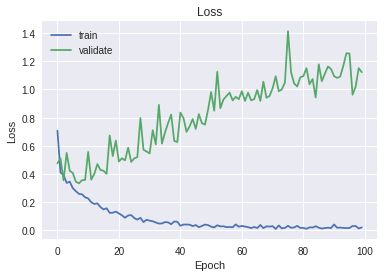

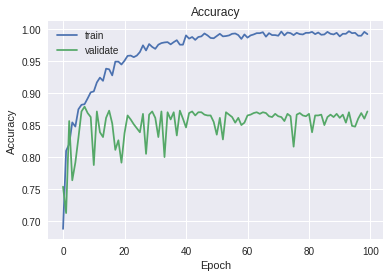

1200/1200 [==============================] - 4s 3ms/step
0.8416666666666667


In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import os

NTEST = 600
NTRAIN = 1001
NVAL = 400
IMG_HEIGHT = 100
IMG_WIDTH = 100
CHANNELS = 3

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = image.load_img(os.path.join(folder,filename), target_size = (IMG_HEIGHT, IMG_WIDTH))
        if img is not None:
            img = image.img_to_array(img)
            img = np.asarray(img)
            images.append(img)
    images = np.asarray(images)
    return images

# Load all data
all_test_cat_images = load_images_from_folder('./dataset/test600/cat')
all_test_dog_images = load_images_from_folder('./dataset/test600/dog')
test_img = np.append(all_test_cat_images, all_test_dog_images, axis = 0)

all_val_cat_images = load_images_from_folder('./dataset/validation400/cat')
all_val_dog_images = load_images_from_folder('./dataset/validation400/dog')
val_img = np.append(all_val_cat_images,all_val_dog_images,axis = 0)

all_train_cat_images  = load_images_from_folder('./dataset/train1000/cat')
all_train_dog_images  = load_images_from_folder('./dataset/train1000/dog')
train_img = np.append(all_train_cat_images,all_train_dog_images,axis = 0)

# Flatten images

test_img = test_img.reshape((NTEST*2,IMG_HEIGHT,IMG_WIDTH,CHANNELS))
val_img = val_img.reshape((NVAL*2,IMG_HEIGHT,IMG_WIDTH,CHANNELS))
train_img = train_img.reshape((NTRAIN*2,IMG_HEIGHT,IMG_WIDTH,CHANNELS))

# Normalize data
test_img = test_img.astype('float32')/255
val_img = val_img.astype('float32')/255
train_img = train_img.astype('float32')/255

# Make labels
test_labels = np.append([1]*NTEST, [0]*NTEST)
val_labels = np.append([1]*NVAL, [0]*NVAL)
train_labels = np.append([1]*NTRAIN, [0]*NTRAIN)

#One (super)hot encoding
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)
train_labels = to_categorical(train_labels)

base_model = VGG16(include_top = False, weights='imagenet', input_shape = (IMG_HEIGHT, IMG_WIDTH, CHANNELS))

top_model = Sequential()
for layer in base_model.layers:
  layer.trainable = False
  top_model.add(layer)

top_model.add(Flatten())
top_model.add(Dense(64, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(2, activation='softmax'))

top_model.summary()
top_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = top_model.fit(train_img, train_labels, epochs = 100, batch_size = 64, validation_data = (val_img, val_labels))
plot_training_score(history)

score = top_model.evaluate(test_img, test_labels)
print(score[1])

### Subtask 4.2
1. Output the resulting accuracy and **briefly** explain what you have done.
2. Perform (between 2 to 5) different experiments of different hyper parameters, different model designs, different activation functions, etc. Then report the following: 

>> 2.1. **Briefly** explain your models and make a comparison table of the accuracies you got. 

>> 2.2. Explain why and which experiments performed better/worse than the others.
 

**1** 

Read the data, flattened it and fixed the size of each image to 100x100 in 3 channels.

Created a network based on VGG16 with the pretrained weights from training with the imagenet dataset. We made our own fully connected head by making a fully connected layer with 256 filters, a dropout layer to reduce overfitting and a fully connected layer with two filters to classify the images into the two classes. The layers in VGG16 was frozen.

**2**

Firsty we tried to experiment with different dropput-rates in the last layer, one run with 0.5, 0.3 and 0.1. There was a small difference in the resulting score between all the three dropout-rates, but a clear difference in the loss in the validate-set. A lower dropout-rate gave more stable but a higher loss, while a higher rate gave a much more varied but lower loss. A dropout-rate of 0.5 gave the best score and the lowest loss so we contiued with that. A lower dropout-rate probably gives a lower score because the network ends up slightly overfitted. 

|Dropout-rate|Test score|
|------------|----------|
|    0.1     |  0.840   |
|    0.3     |  0.845   |
|    0.5     |  0.848   |

We also tried different numbers of filters in the fully connected head. We tried 256, 128 and 64. Here The optimal number of filters turned out to be 128. This might be because 64 is too few to classify all features, while 256 becomes too many and causes some overfitting. 

|# of filters|Test score|
|------------|----------|
|    64      |  0.842   |
|    128     |  0.858   |
|    256     |  0.848   |


